### KMeans Clustering

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r'D:\my stuff\Coding\ML\credit_classification.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [5]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [6]:
my_df = df.select_dtypes(exclude=[object])
my_df.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [7]:
df1 = df[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX',
'PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']]

In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [9]:
df1.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [10]:
df1.dropna(inplace=True)
df1.isnull().sum()

C:\Users\Mrunmayee\AppData\Local\Temp\ipykernel_25308\2400609255.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(inplace=True)


BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

<Axes: ylabel='BALANCE'>

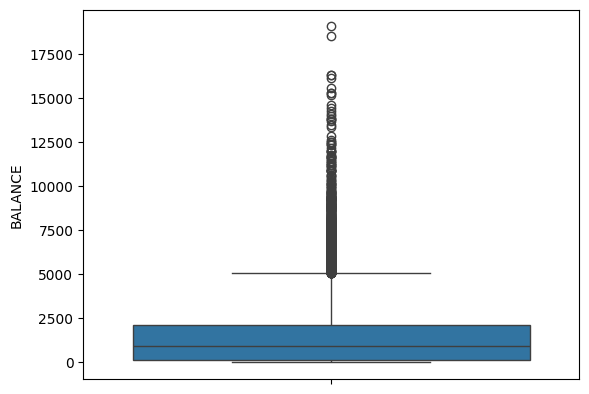

In [11]:
sns.boxplot(df1['BALANCE'])

<Axes: ylabel='PURCHASES'>

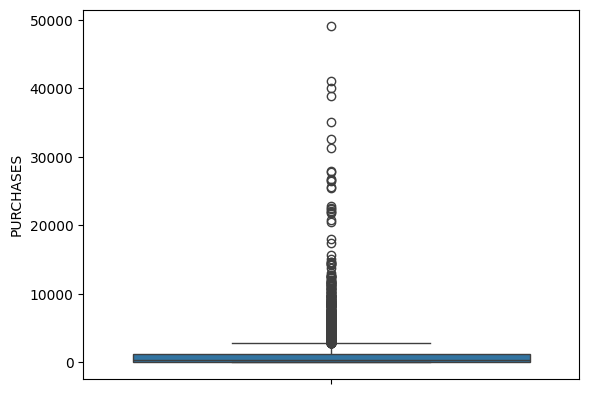

In [12]:
sns.boxplot(df1['PURCHASES'])

<Axes: ylabel='ONEOFF_PURCHASES'>

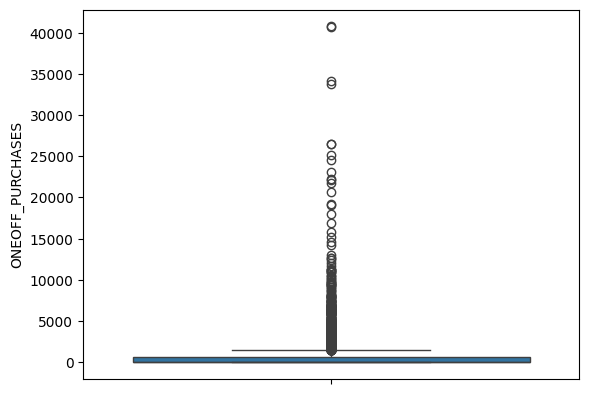

In [13]:
sns.boxplot(df1['ONEOFF_PURCHASES'])

<Axes: ylabel='INSTALLMENTS_PURCHASES'>

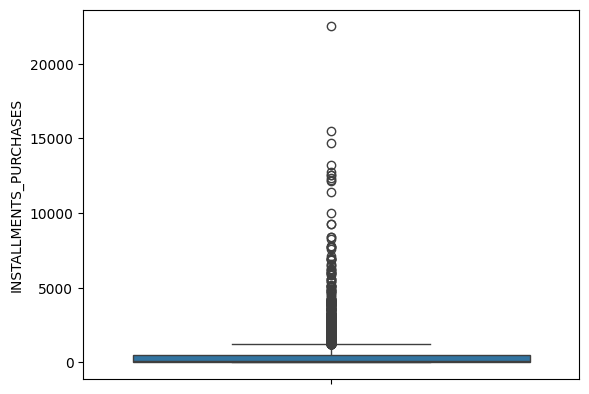

In [14]:
sns.boxplot(df1['INSTALLMENTS_PURCHASES'])

<Axes: ylabel='CASH_ADVANCE'>

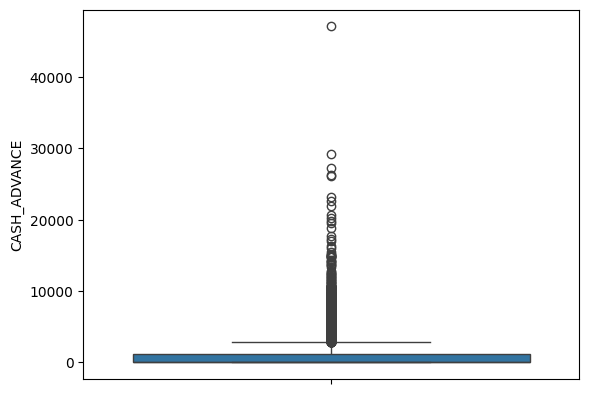

In [15]:
sns.boxplot(df1['CASH_ADVANCE'])

<Axes: ylabel='ONEOFF_PURCHASES_FREQUENCY'>

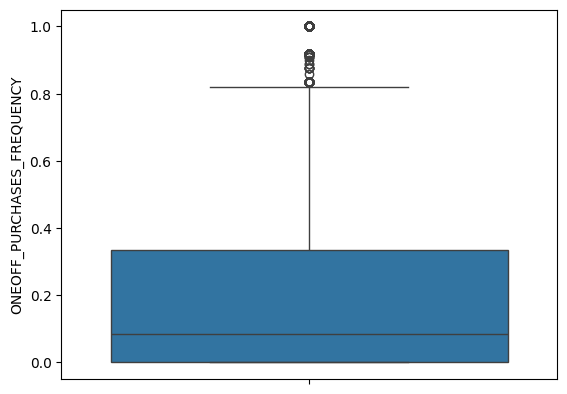

In [16]:
sns.boxplot(df1['ONEOFF_PURCHASES_FREQUENCY'])

<Axes: ylabel='CASH_ADVANCE_FREQUENCY'>

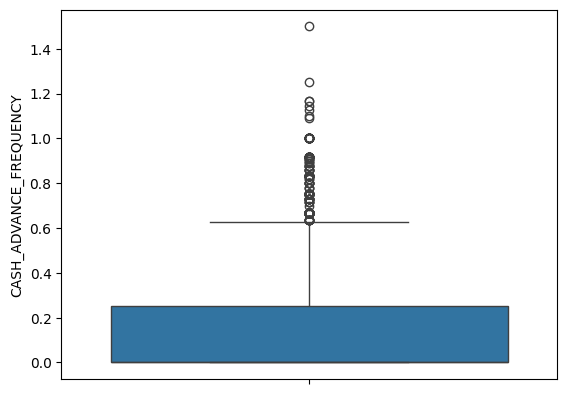

In [17]:
sns.boxplot(df1['CASH_ADVANCE_FREQUENCY'])

<Axes: ylabel='CASH_ADVANCE_TRX'>

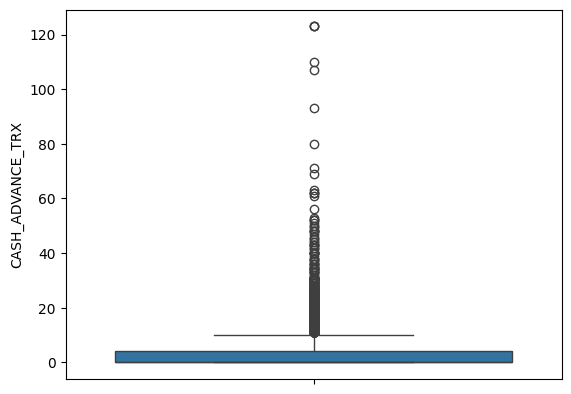

In [18]:
sns.boxplot(df1['CASH_ADVANCE_TRX'])

<Axes: ylabel='PURCHASES_TRX'>

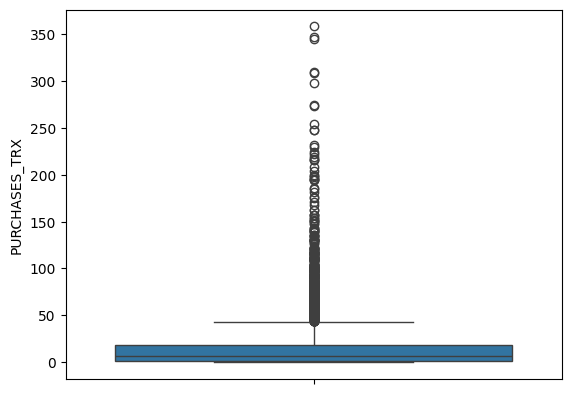

In [19]:
sns.boxplot(df1['PURCHASES_TRX'])

<Axes: ylabel='CREDIT_LIMIT'>

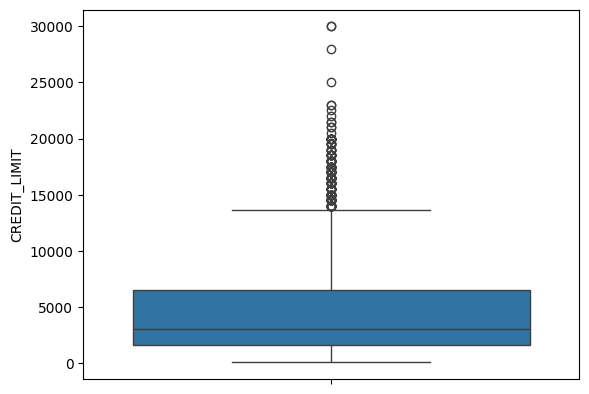

In [20]:
sns.boxplot(df1['CREDIT_LIMIT'])

<Axes: ylabel='PAYMENTS'>

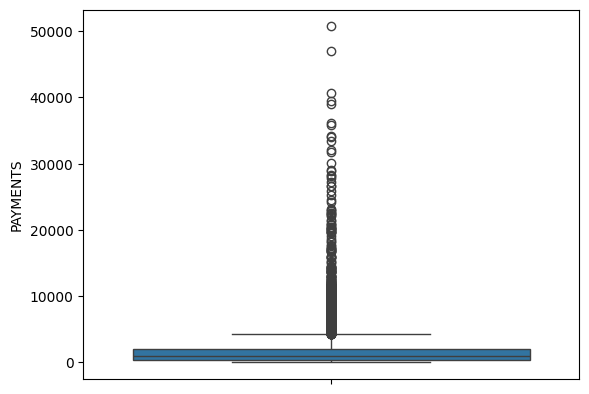

In [21]:
sns.boxplot(df1['PAYMENTS'])

<Axes: ylabel='MINIMUM_PAYMENTS'>

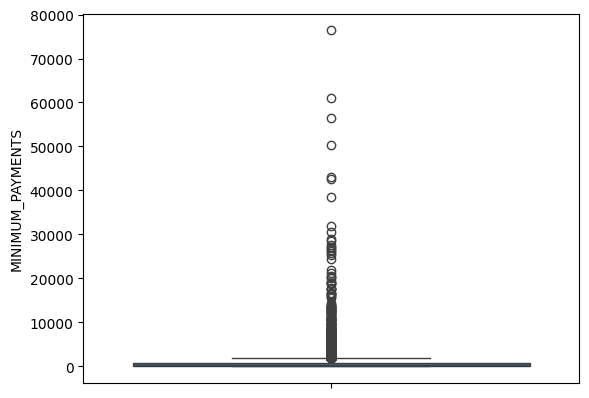

In [22]:
sns.boxplot(df1['MINIMUM_PAYMENTS'])

<Axes: ylabel='PRC_FULL_PAYMENT'>

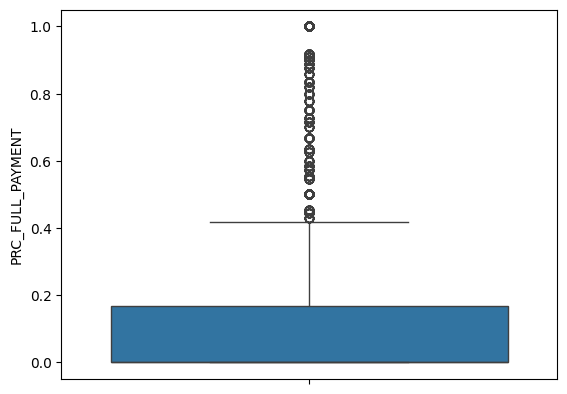

In [23]:
sns.boxplot(df1['PRC_FULL_PAYMENT'])

<Axes: ylabel='BALANCE'>

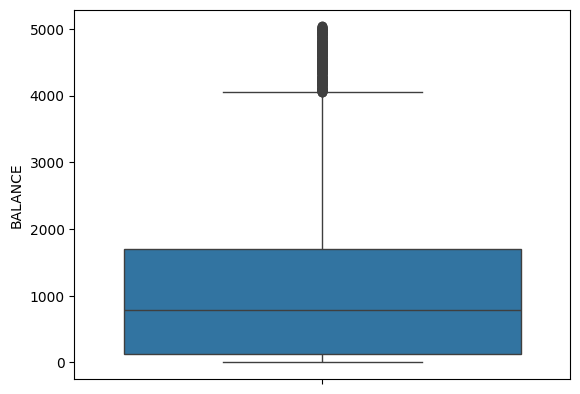

In [24]:
Q1 = df1['BALANCE'].quantile(0.25)
Q3 = df1['BALANCE'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['BALANCE'] > l_limit) & (df1['BALANCE'] < u_limit)]
sns.boxplot(df2['BALANCE'])

<Axes: ylabel='PURCHASES'>

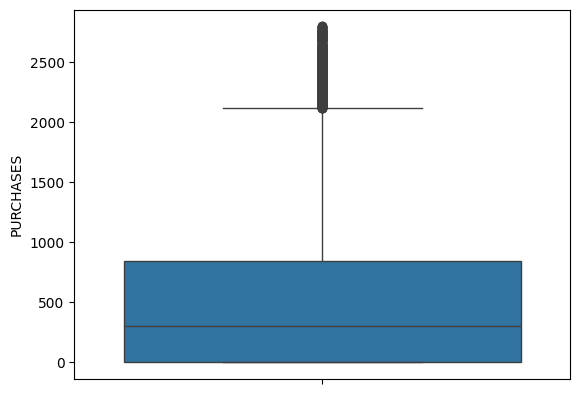

In [25]:
Q1 = df1['PURCHASES'].quantile(0.25)
Q3 = df1['PURCHASES'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['PURCHASES'] > l_limit) & (df1['PURCHASES'] < u_limit)]
sns.boxplot(df2['PURCHASES'])

<Axes: ylabel='ONEOFF_PURCHASES'>

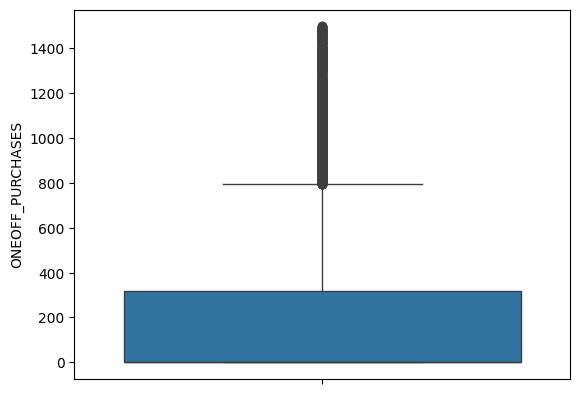

In [26]:
Q1 = df1['ONEOFF_PURCHASES'].quantile(0.25)
Q3 = df1['ONEOFF_PURCHASES'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['ONEOFF_PURCHASES'] > l_limit) & (df1['ONEOFF_PURCHASES'] < u_limit)]
sns.boxplot(df2['ONEOFF_PURCHASES'])

<Axes: ylabel='INSTALLMENTS_PURCHASES'>

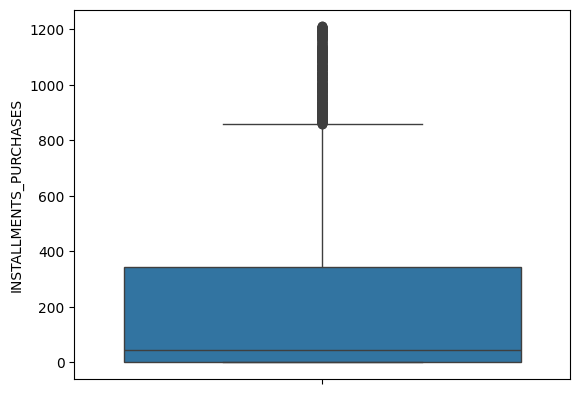

In [27]:
Q1 = df1['INSTALLMENTS_PURCHASES'].quantile(0.25)
Q3 = df1['INSTALLMENTS_PURCHASES'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['INSTALLMENTS_PURCHASES'] > l_limit) & (df1['INSTALLMENTS_PURCHASES'] < u_limit)]
sns.boxplot(df2['INSTALLMENTS_PURCHASES'])

<Axes: ylabel='CASH_ADVANCE'>

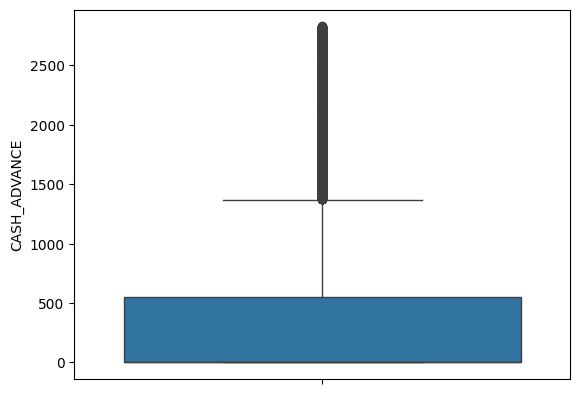

In [28]:
Q1 = df1['CASH_ADVANCE'].quantile(0.25)
Q3 = df1['CASH_ADVANCE'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['CASH_ADVANCE'] > l_limit) & (df1['CASH_ADVANCE'] < u_limit)]
sns.boxplot(df2['CASH_ADVANCE'])

<Axes: ylabel='ONEOFF_PURCHASES_FREQUENCY'>

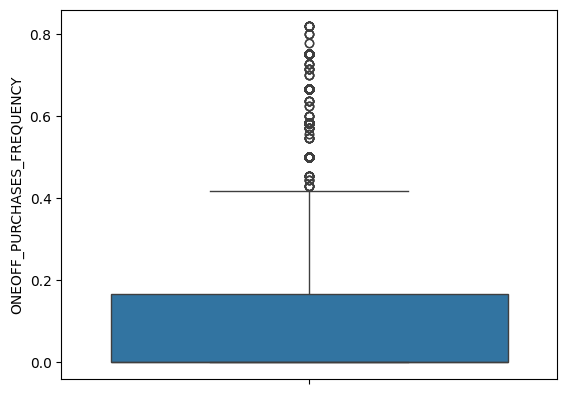

In [29]:
Q1 = df1['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.25)
Q3 = df1['ONEOFF_PURCHASES_FREQUENCY'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['ONEOFF_PURCHASES_FREQUENCY'] > l_limit) & (df1['ONEOFF_PURCHASES_FREQUENCY'] < u_limit)]
sns.boxplot(df2['ONEOFF_PURCHASES_FREQUENCY'])

<Axes: ylabel='CASH_ADVANCE_FREQUENCY'>

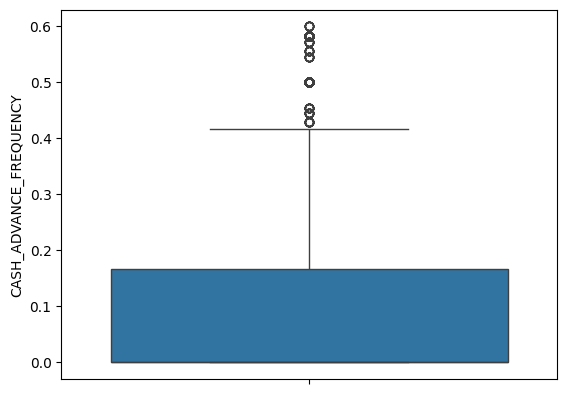

In [30]:
Q1 = df1['CASH_ADVANCE_FREQUENCY'].quantile(0.25)
Q3 = df1['CASH_ADVANCE_FREQUENCY'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['CASH_ADVANCE_FREQUENCY'] > l_limit) & (df1['CASH_ADVANCE_FREQUENCY'] < u_limit)]
sns.boxplot(df2['CASH_ADVANCE_FREQUENCY'])

<Axes: ylabel='CASH_ADVANCE_TRX'>

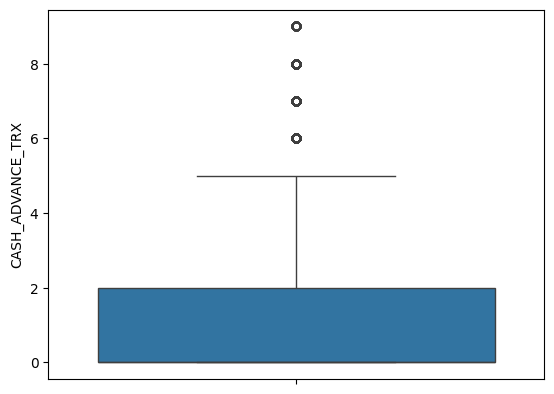

In [31]:
Q1 = df1['CASH_ADVANCE_TRX'].quantile(0.25)
Q3 = df1['CASH_ADVANCE_TRX'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['CASH_ADVANCE_TRX'] > l_limit) & (df1['CASH_ADVANCE_TRX'] < u_limit)]
sns.boxplot(df2['CASH_ADVANCE_TRX'])

<Axes: ylabel='PURCHASES_TRX'>

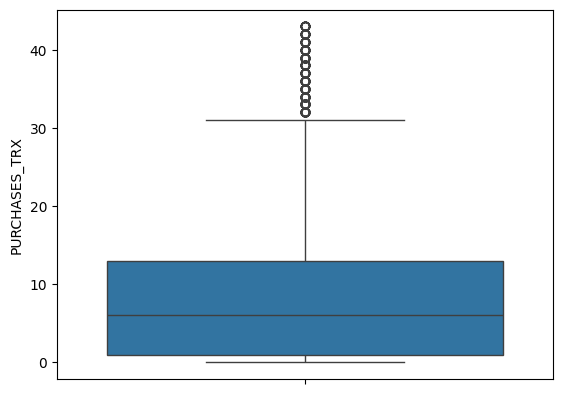

In [32]:
Q1 = df1['PURCHASES_TRX'].quantile(0.25)
Q3 = df1['PURCHASES_TRX'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['PURCHASES_TRX'] > l_limit) & (df1['PURCHASES_TRX'] < u_limit)]
sns.boxplot(df2['PURCHASES_TRX'])

<Axes: ylabel='CREDIT_LIMIT'>

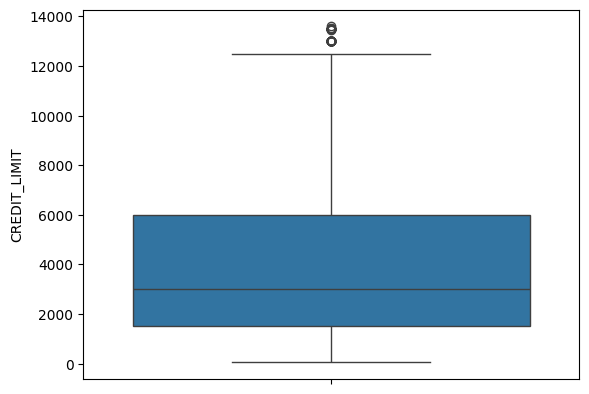

In [33]:
Q1 = df1['CREDIT_LIMIT'].quantile(0.25)
Q3 = df1['CREDIT_LIMIT'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['CREDIT_LIMIT'] > l_limit) & (df1['CREDIT_LIMIT'] < u_limit)]
sns.boxplot(df2['CREDIT_LIMIT'])

<Axes: ylabel='PAYMENTS'>

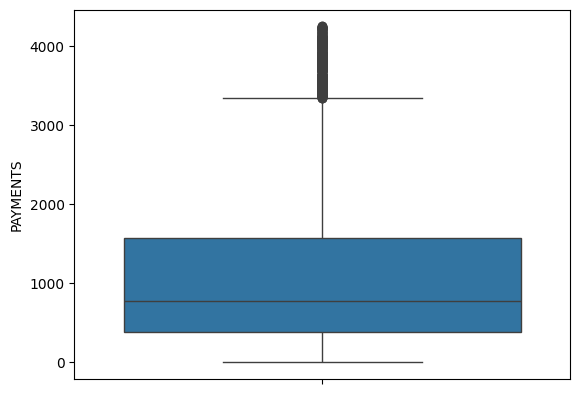

In [34]:
Q1 = df1['PAYMENTS'].quantile(0.25)
Q3 = df1['PAYMENTS'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['PAYMENTS'] > l_limit) & (df1['PAYMENTS'] < u_limit)]
sns.boxplot(df2['PAYMENTS'])

<Axes: ylabel='MINIMUM_PAYMENTS'>

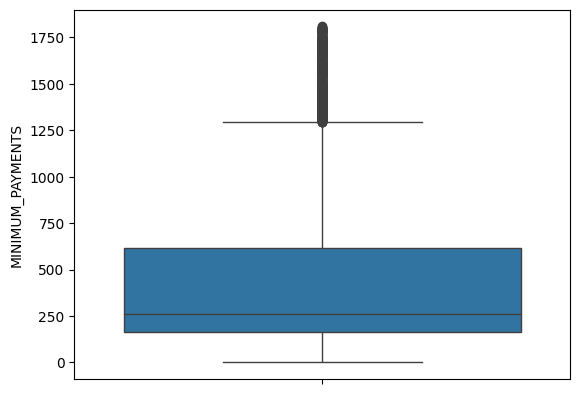

In [35]:
Q1 = df1['MINIMUM_PAYMENTS'].quantile(0.25)
Q3 = df1['MINIMUM_PAYMENTS'].quantile(0.75)
IQR = Q3 - Q1

l_limit = Q1 - 1.5 * IQR
u_limit = Q3 + 1.5 * IQR

df2 = df1[(df1['MINIMUM_PAYMENTS'] > l_limit) & (df1['MINIMUM_PAYMENTS'] < u_limit)]
sns.boxplot(df2['MINIMUM_PAYMENTS'])

In [36]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7795 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           7795 non-null   float64
 1   BALANCE_FREQUENCY                 7795 non-null   float64
 2   PURCHASES                         7795 non-null   float64
 3   ONEOFF_PURCHASES                  7795 non-null   float64
 4   INSTALLMENTS_PURCHASES            7795 non-null   float64
 5   CASH_ADVANCE                      7795 non-null   float64
 6   PURCHASES_FREQUENCY               7795 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        7795 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  7795 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            7795 non-null   float64
 10  CASH_ADVANCE_TRX                  7795 non-null   int64  
 11  PURCHASES_TRX                     7795 non-null   int64  
 12  CREDIT_LIMI

In [37]:
x = df2[['BALANCE','BALANCE_FREQUENCY','PURCHASES','ONEOFF_PURCHASES','INSTALLMENTS_PURCHASES','CASH_ADVANCE','PURCHASES_FREQUENCY',
'ONEOFF_PURCHASES_FREQUENCY','PURCHASES_INSTALLMENTS_FREQUENCY','CASH_ADVANCE_FREQUENCY','CASH_ADVANCE_TRX','PURCHASES_TRX','CREDIT_LIMIT','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','TENURE']].values

In [38]:
km = KMeans(n_clusters=5, init='k-means++')

In [39]:
km.fit(x)
y_kmeans = km.predict(x)

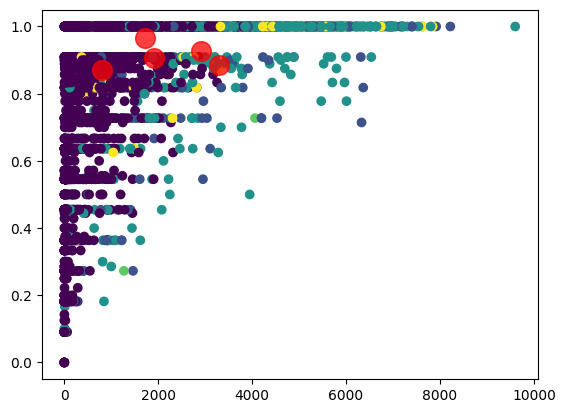

In [41]:
plt.scatter(x[:, 0], x[:, 1], c=y_kmeans)
centers = km.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75)